In [23]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import linear_model

# distribution

In [2]:
uniform_data = stats.uniform.rvs(size=100000,  # Generate 100000 numbers
                                 loc = 0,      # From 0 
                                 scale=10)  

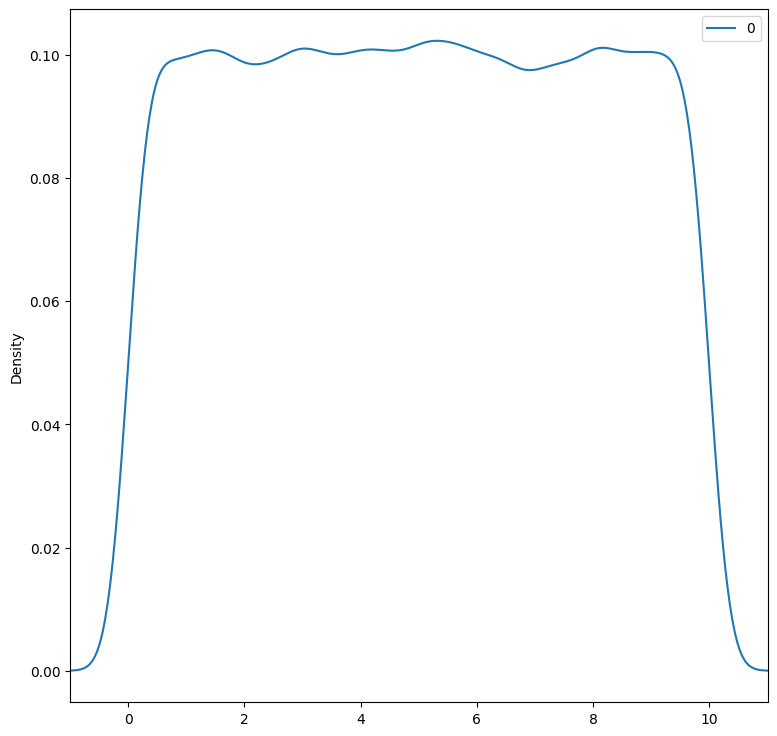

In [3]:
pd.DataFrame(uniform_data).plot(kind="density",  # Plot the distribution
                               figsize=(9,9),
                               xlim=(-1,11));

In [4]:
stats.uniform.cdf(x=2.5,         # Cutoff value (quantile) to check
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

np.float64(0.25)

In [5]:
stats.uniform.ppf(q=0.4,         # Probability cutoff
                  loc=0,         # Distribution start
                  scale=10)   

np.float64(4.0)

In [6]:
for x in range(-1,12,3):
    print("Density at x value " + str(x))
    print( stats.uniform.pdf(x, loc=0, scale=10) )   

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


In [7]:
import random

random.randint(0,10)     # Get a random integer in the specified range


2

In [8]:
random.choice([2,4,6,9]) # Get a random element from a sequence

6

In [9]:
random.random()          # Get a real number between 0 and 1

0.11117785727508667

In [10]:
random.uniform(0,10)     # Get a real in the specified range

2.5767573846317813

In [11]:
random.seed(12)  # Set the seed to an arbitrary value

print([random.uniform(0,10) for x in range(4)])

random.seed(12)  # Set the seed to the same value

print([random.uniform(0,10) for x in range(4)])

[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]
[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


In [12]:
prob_under_minus1 = stats.norm.cdf(x= -1,  
                                loc = 0,               
                                scale= 1)     

prob_over_1 = 1 - stats.norm.cdf(x= 1,  
                                loc = 0,               
                                scale= 1) 

between_prob = 1-(prob_under_minus1+prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)

0.15865525393145707 0.15865525393145707 0.6826894921370859


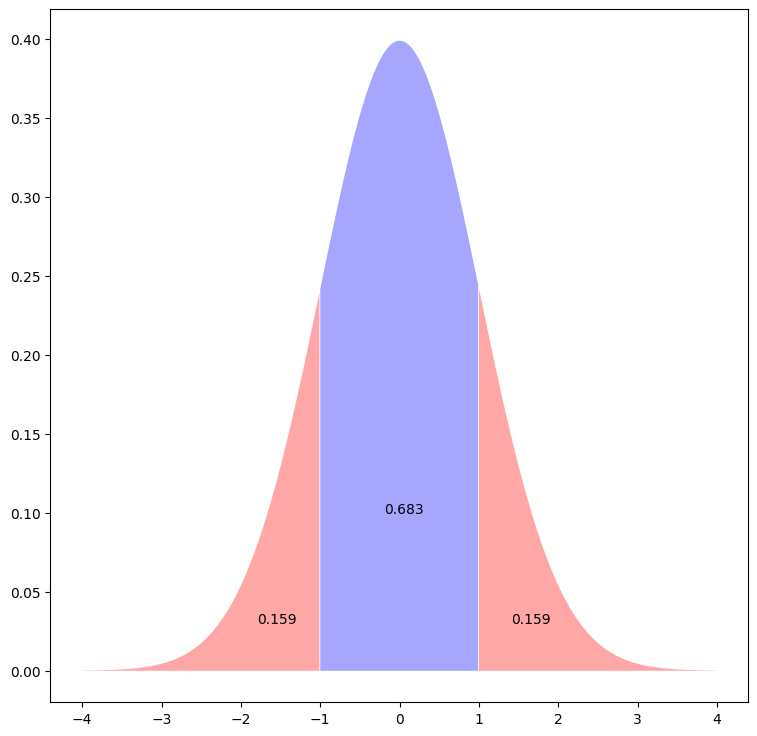

In [13]:
# Plot normal distribution areas*

plt.rcParams["figure.figsize"] = (9,9)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3));

In [14]:
print( stats.norm.ppf(q=0.025) ) # Find the quantile for the 2.5% cutoff

print( stats.norm.ppf(q=0.975) ) # Find the quantile for the 97.5% cutoff

-1.9599639845400545
1.959963984540054


# test

In [16]:
np.random.seed(6)

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

print( population_ages.mean() )
print( minnesota_ages.mean() )

43.000112
39.26


In [17]:
stats.ttest_1samp(a = minnesota_ages,               # Sample data
                 popmean = population_ages.mean())  # Pop mean

TtestResult(statistic=np.float64(-2.5742714883655027), pvalue=np.float64(0.013118685425061678), df=np.int64(49))

In [19]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=49)  # Degrees of freedom


np.float64(-2.0095752371292397)

In [20]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=49)  # Degrees of freedom

np.float64(2.0095752371292397)

In [21]:
stats.t.cdf(x= -2.5742,      # T-test statistic
               df= 49) * 2   # Multiply by two for two tailed test *

np.float64(0.013121066545690117)

# prediction

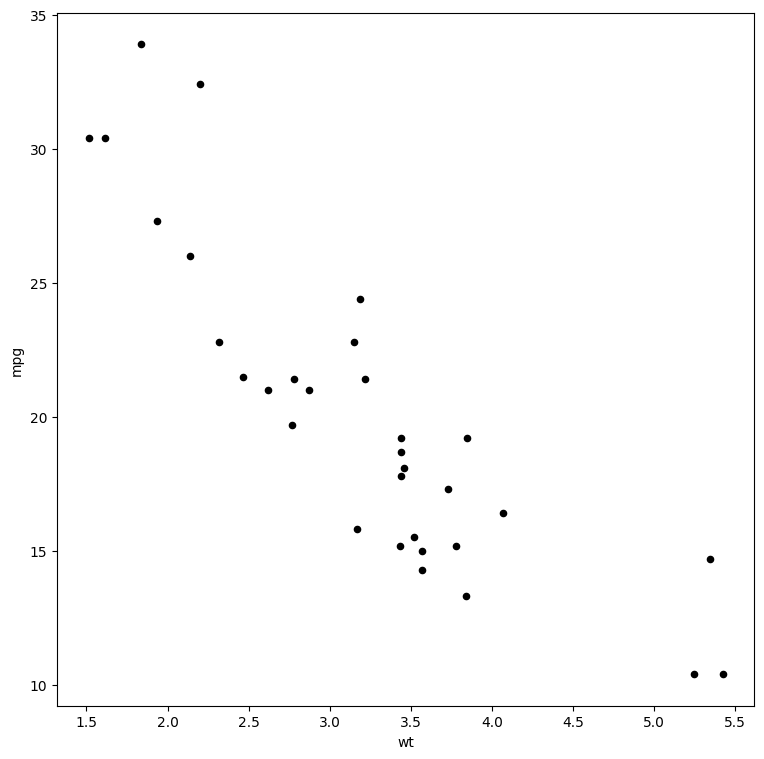

In [22]:
# Load mtcars data set
mtcars = pd.read_csv("./mtcars.csv")

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black");

In [24]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(mtcars["wt"]), 
                     y = mtcars["mpg"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

37.28512616734204
[-5.34447157]


In [25]:
regression_model.score(X = pd.DataFrame(mtcars["wt"]), 
                       y = mtcars["mpg"])

0.7528327936582646

In [26]:
train_prediction = regression_model.predict(X = pd.DataFrame(mtcars["wt"]))

# Actual - prediction = residuals
residuals = mtcars["mpg"] - train_prediction

residuals.describe()

count    3.200000e+01
mean    -8.215650e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64